<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/Heirarchical_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/heirarchical clustering.zip'

Archive:  /content/heirarchical clustering.zip
   creating: Project - Heirarchical Clustering/ Project/
   creating: Project - Heirarchical Clustering/ Project/Hierarchical Clustering/
   creating: Project - Heirarchical Clustering/ Project/Hierarchical Clustering/Dataset/
  inflating: Project - Heirarchical Clustering/ Project/Hierarchical Clustering/Dataset/google_review_ratings.csv  
   creating: Project - Heirarchical Clustering/ Project/Hierarchical Clustering/Problem Statement/
  inflating: Project - Heirarchical Clustering/ Project/Hierarchical Clustering/Problem Statement/Problem Statement_Heirarchical Clustering.pdf  


Load all the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans

Import the data

In [ ]:
df = pd.read_csv("/content/Project - Heirarchical Clustering/ Project/Hierarchical Clustering/Dataset/google_review_ratings.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
df.drop(['User','Category 11','Unnamed: 25'],axis = 1, inplace = True)

In [ ]:
df.dropna(axis=1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 13  5456 non-null   float64
 11  Category 14  5456 non-null   float64
 12  Category 15  5456 non-null   float64
 13  Category 16  5456 non-null   float64
 14  Category 17  5456 non-null   float64
 15  Category 18  5456 non-null   float64
 16  Category 19  5456 non-null   float64
 17  Category 20  5456 non-null   float64
 18  Category 21  5456 non-null   float64
 19  Catego

In [ ]:
 linkage_data = linkage(df,method = 'ward', metric = 'euclidean')

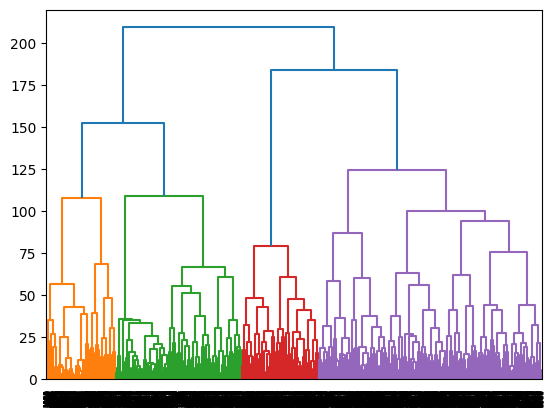

In [ ]:
dendrogram(linkage_data)
plt.show()

In [ ]:
heirarchical_clustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage = 'ward')

In [ ]:
labels = heirarchical_clustering.fit_predict(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
labels

array([0, 0, 0, ..., 2, 2, 2])

Silhoutte Score for evaluation

In [ ]:
df['Heirarchical Clusters']= labels

In [ ]:
df.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 13', 'Category 14', 'Category 15', 'Category 16',
       'Category 17', 'Category 18', 'Category 19', 'Category 20',
       'Category 21', 'Category 22', 'Category 23', 'Heirarchical Clusters'],
      dtype='object')

In [ ]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import silhouette_samples
print(silhouette_score(df.iloc[:,:-1],labels = df['Heirarchical Clusters']))

0.11995109658866675


<Axes: >

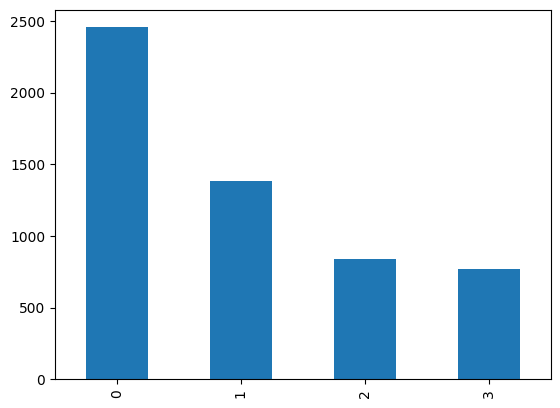

In [ ]:
df['Heirarchical Clusters'].value_counts().plot(kind = 'bar')

In [ ]:
WCSS=[]
for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit(df)
  WCSS.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Within the cluster sum of squares across multiple clusters')

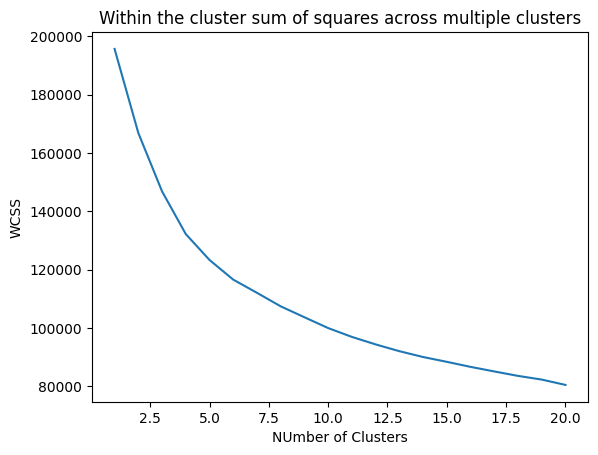

In [ ]:
plt.plot(range(1,21),WCSS)
plt.xlabel('NUmber of Clusters')
plt.ylabel('WCSS')
plt.title('Within the cluster sum of squares across multiple clusters')

K Means with 12 Clusters

In [ ]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

In [ ]:
df['Clusters'] = kmeans.labels_